In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<h2> API <h2/>

O API escolhido foi das taxas de câmbio históricas das principais moedas do mundo.
USD, BRL e EUR principalmente.

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
# O processo de criação dessa função pode ser visto no final dessa notebook.
def criardf(base):
    
    import requests
    import pandas as pd
    import json

    url = "https://api.exchangeratesapi.io/history"
    period = "&start_at=2010-01-01&end_at=2019-12-14"
    response = requests.get(url+base+period)
    
    data = pd.DataFrame(response.json())
    
    # Criar df com a coluna de dict
    data_currency = data["rates"].apply(pd.Series)
    
    # Criar novo index e renomear antigo index para "Date"
    data_currency.reset_index(inplace=True)
    data_currency.rename(columns = {"index":"Date"}, inplace=True)
    
    # Mudar o valor da coluna "Date" para datetime
    data_currency["Date"] = pd.to_datetime(data_currency["Date"])
    
    return data_currency
    

In [5]:
# Criar o df em relação ao Dollar e mudar a ordem das colunas para que "USD" fique no começo da tabela
dataUSD = criardf("?base=USD")
dataUSD = dataUSD[['Date', 'USD', 'EUR', 'BRL', 'CAD', 'HKD',  'PHP', 'DKK', 'HUF', 'CZK', 'GBP', 'RON', 'SEK', 'IDR',
 'INR', 'RUB', 'HRK', 'JPY', 'THB', 'CHF', 'MYR', 'BGN', 'TRY', 'CNY',
 'NOK', 'NZD', 'ZAR', 'MXN', 'SGD', 'AUD', 'ILS', 'KRW', 'PLN', 'ISK']]

# export
dataUSD.to_csv(r"APIdataUSD.csv")
dataUSD

,Date,USD,EUR,BRL,CAD,HKD,PHP,DKK,HUF,CZK,GBP,RON,SEK,IDR,INR,RUB,HRK,JPY,THB,CHF,MYR,BGN,TRY,CNY,NOK,NZD,ZAR,MXN,SGD,AUD,ILS,KRW,PLN,ISK
0,2010-01-04,1.0,0.694975,1.731670,1.039197,7.756481,45.937869,5.171659,187.539092,18.267427,0.619501,2.936479,7.083884,9411.779832,46.299951,29.995135,5.068872,92.862603,33.205226,1.033637,3.397526,1.359233,1.488012,6.827299,5.718952,1.373549,7.340190,12.972687,1.398707,1.103968,NaN,1155.306137,2.851484,NaN
1,2010-01-05,1.0,0.692425,1.718391,1.035314,7.756336,45.915386,5.152680,186.262291,18.162997,0.623494,2.903337,7.071043,9337.418640,46.244980,29.843512,5.049855,91.773993,33.140839,1.028666,3.387481,1.354245,1.473757,6.827171,5.686193,1.357707,7.275239,12.798297,1.394682,1.091885,NaN,1139.551309,2.833403,NaN
2,2010-01-06,1.0,0.696864,1.733937,1.039721,7.755401,46.004878,5.185157,187.372822,18.354007,0.626202,2.897909,7.098955,9321.644599,45.829965,29.860627,5.083624,92.466899,33.157491,1.032962,3.380976,1.362927,1.476307,6.827387,5.705923,1.363763,7.339373,12.805017,1.395749,1.092474,NaN,1134.355401,2.853868,NaN
3,2010-01-07,1.0,0.699105,1.745596,1.033907,7.755173,45.832634,5.202111,188.968121,18.435403,0.628915,2.917436,7.139262,9273.916387,45.707494,29.794114,5.097525,93.330537,33.164849,1.036913,3.371435,1.367310,1.481753,6.827671,5.731264,1.365772,7.402335,12.793135,1.397721,1.091373,NaN,1134.997204,2.882061,NaN
4,2010-01-08,1.0,0.700624,1.746795,1.035592,7.755833,45.810972,5.213340,188.726967,18.434106,0.625937,2.918447,7.164226,9298.500666,45.757724,29.776501,5.096196,93.435157,33.159812,1.037974,3.377496,1.370280,1.473411,6.827506,5.723744,1.370840,7.444125,12.748967,1.398935,1.093673,NaN,1130.813424,2.878722,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,2019-12-09,1.0,0.902935,4.144740,1.325056,7.827720,50.849661,6.746998,299.395034,23.050113,0.760226,4.315034,9.520090,14001.002257,71.067269,63.722889,6.716749,108.487585,30.312415,0.989526,4.160181,1.765959,5.803160,7.039278,9.141129,1.525056,14.607675,19.277562,1.359819,1.465282,3.470339,1191.232506,3.867901,121.264108
2545,2019-12-10,1.0,0.902772,4.142909,1.324005,7.826216,50.774578,6.746502,298.681954,23.045048,0.758987,4.312810,9.530107,14010.002708,70.922632,63.611718,6.716439,108.576329,30.295206,0.986007,4.164485,1.765641,5.804821,7.038729,9.192290,1.529746,14.816376,19.220276,1.359754,1.469261,3.464115,1192.326442,3.873161,121.603322
2546,2019-12-11,1.0,0.902935,4.116479,1.323792,7.813815,50.816253,6.747449,298.636569,23.044695,0.760677,4.315395,9.444244,14044.496614,70.800451,63.559819,6.716479,108.749436,30.264560,0.985643,4.164515,1.765959,5.810293,7.039278,9.164334,1.528126,14.764063,19.225282,1.359819,1.462212,3.476569,1193.227991,3.870790,121.986456
2547,2019-12-12,1.0,0.897908,4.111341,1.317770,7.804885,50.710245,6.710245,295.770854,22.913711,0.759271,4.291192,9.382688,14035.000449,70.876807,62.933016,6.679537,108.601957,30.175092,0.982221,4.159468,1.756128,5.781629,7.037263,9.100296,1.518003,14.658166,19.110263,1.357367,1.451468,3.479303,1188.282302,3.846278,122.744006


In [6]:
# Criar o df em relação ao EUR e mudar a ordem.
dataEUR = criardf("?base=EUR")
dataEUR["EUR"] = 1.0
dataEUR = dataEUR[['Date', 'EUR', 'USD', 'BRL', 'CAD', 'HKD',  'PHP', 'DKK', 'HUF', 'CZK', 'GBP', 'RON', 'SEK', 'IDR',
 'INR', 'RUB', 'HRK', 'JPY', 'THB', 'CHF', 'MYR', 'BGN', 'TRY', 'CNY',
 'NOK', 'NZD', 'ZAR', 'MXN', 'SGD', 'AUD', 'ILS', 'KRW', 'PLN', 'ISK']]
dataEUR

,Date,EUR,USD,BRL,CAD,HKD,PHP,DKK,HUF,CZK,GBP,RON,SEK,IDR,INR,RUB,HRK,JPY,THB,CHF,MYR,BGN,TRY,CNY,NOK,NZD,ZAR,MXN,SGD,AUD,ILS,KRW,PLN,ISK
0,2010-01-04,1.0,1.4389,2.4917,1.4953,11.1608,66.100,7.4415,269.85,26.285,0.89140,4.2253,10.1930,13542.61,66.6210,43.1600,7.2936,133.62,47.779,1.4873,4.8887,1.9558,2.1411,9.8238,8.2290,1.9764,10.5618,18.6664,2.0126,1.5885,NaN,1662.37,4.1030,NaN
1,2010-01-05,1.0,1.4442,2.4817,1.4952,11.2017,66.311,7.4415,269.00,26.231,0.90045,4.1930,10.2120,13485.10,66.7870,43.1000,7.2930,132.54,47.862,1.4856,4.8922,1.9558,2.1284,9.8598,8.2120,1.9608,10.5069,18.4833,2.0142,1.5769,NaN,1645.74,4.0920,NaN
2,2010-01-06,1.0,1.4350,2.4882,1.4920,11.1290,66.017,7.4407,268.88,26.338,0.89860,4.1585,10.1870,13376.56,65.7660,42.8500,7.2950,132.69,47.581,1.4823,4.8517,1.9558,2.1185,9.7973,8.1880,1.9570,10.5320,18.3752,2.0029,1.5677,NaN,1627.80,4.0953,NaN
3,2010-01-07,1.0,1.4304,2.4969,1.4789,11.0930,65.559,7.4411,270.30,26.370,0.89960,4.1731,10.2120,13265.41,65.3800,42.6175,7.2915,133.50,47.439,1.4832,4.8225,1.9558,2.1195,9.7663,8.1980,1.9536,10.5883,18.2993,1.9993,1.5611,NaN,1623.50,4.1225,NaN
4,2010-01-08,1.0,1.4273,2.4932,1.4781,11.0699,65.386,7.4410,269.37,26.311,0.89340,4.1655,10.2255,13271.75,65.3100,42.5000,7.2738,133.36,47.329,1.4815,4.8207,1.9558,2.1030,9.7449,8.1695,1.9566,10.6250,18.1966,1.9967,1.5610,NaN,1614.01,4.1088,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,2019-12-09,1.0,1.1075,4.5903,1.4675,8.6692,56.316,7.4723,331.58,25.528,0.84195,4.7789,10.5435,15506.11,78.7070,70.5731,7.4388,120.15,33.571,1.0959,4.6074,1.9558,6.4270,7.7960,10.1238,1.6890,16.1780,21.3499,1.5060,1.6228,3.8434,1319.29,4.2837,134.3
2545,2019-12-10,1.0,1.1077,4.5891,1.4666,8.6691,56.243,7.4731,330.85,25.527,0.84073,4.7773,10.5565,15518.88,78.5610,70.4627,7.4398,120.27,33.558,1.0922,4.6130,1.9558,6.4300,7.7968,10.1823,1.6945,16.4121,21.2903,1.5062,1.6275,3.8372,1320.74,4.2903,134.7
2546,2019-12-11,1.0,1.1075,4.5590,1.4661,8.6538,56.279,7.4728,330.74,25.522,0.84245,4.7793,10.4595,15554.28,78.4115,70.3925,7.4385,120.44,33.518,1.0916,4.6122,1.9558,6.4349,7.7960,10.1495,1.6924,16.3512,21.2920,1.5060,1.6194,3.8503,1321.50,4.2869,135.1
2547,2019-12-12,1.0,1.1137,4.5788,1.4676,8.6923,56.476,7.4732,329.40,25.519,0.84560,4.7791,10.4495,15630.78,78.9355,70.0885,7.4390,120.95,33.606,1.0939,4.6324,1.9558,6.4390,7.8374,10.1350,1.6906,16.3248,21.2831,1.5117,1.6165,3.8749,1323.39,4.2836,136.7


In [7]:
# Criar o df em relação ao BRL e mudar a ordem.
dataBRL = criardf("?base=BRL")
dataBRL = dataBRL[['Date', 'BRL', 'USD', 'EUR', 'CAD', 'HKD',  'PHP', 'DKK', 'HUF', 'CZK', 'GBP', 'RON', 'SEK', 'IDR',
 'INR', 'RUB', 'HRK', 'JPY', 'THB', 'CHF', 'MYR', 'BGN', 'TRY', 'CNY',
 'NOK', 'NZD', 'ZAR', 'MXN', 'SGD', 'AUD', 'ILS', 'KRW', 'PLN', 'ISK']]
dataBRL

,Date,BRL,USD,EUR,CAD,HKD,PHP,DKK,HUF,CZK,GBP,RON,SEK,IDR,INR,RUB,HRK,JPY,THB,CHF,MYR,BGN,TRY,CNY,NOK,NZD,ZAR,MXN,SGD,AUD,ILS,KRW,PLN,ISK
0,2010-01-04,1.0,0.577477,0.401332,0.600112,4.479191,26.528073,2.986515,108.299555,10.549023,0.357748,1.695750,4.090781,5435.088494,26.737167,17.321507,2.927158,53.626038,19.175262,0.596902,1.961994,0.784926,0.859293,3.942609,3.302565,0.793193,4.238793,7.491432,0.807722,0.637517,NaN,667.162981,1.646667,NaN
1,2010-01-05,1.0,0.581940,0.402950,0.602490,4.513720,26.719990,2.998549,108.393440,10.569771,0.362836,1.689568,4.114921,5433.815530,26.911794,17.367127,2.938711,53.406939,19.285973,0.598622,1.971310,0.788089,0.857638,3.973002,3.309022,0.790104,4.233751,7.447838,0.811621,0.635411,NaN,663.150260,1.648870,NaN
2,2010-01-06,1.0,0.576722,0.401897,0.599630,4.472711,26.532031,2.990395,108.062053,10.585162,0.361145,1.671288,4.094124,5375.998714,26.431155,17.221284,2.931838,53.327707,19.122659,0.595732,1.949883,0.786030,0.851419,3.937505,3.290732,0.786512,4.232779,7.384937,0.804959,0.630054,NaN,654.207861,1.645889,NaN
3,2010-01-07,1.0,0.572870,0.400497,0.592294,4.442709,26.256158,2.980135,108.254235,10.561096,0.360287,1.671312,4.089871,5312.751812,26.184469,17.068165,2.920221,53.466298,18.999159,0.594017,1.931395,0.783291,0.848853,3.911370,3.283271,0.782410,4.240578,7.328808,0.800713,0.625215,NaN,650.206256,1.651047,NaN
4,2010-01-08,1.0,0.572477,0.401091,0.592853,4.440037,26.225734,2.984518,108.041874,10.553104,0.358335,1.670744,4.101356,5323.179047,26.195251,17.046366,2.917455,53.489491,18.983234,0.594216,1.933539,0.784454,0.843494,3.908591,3.276713,0.784775,4.261592,7.298492,0.800858,0.626103,NaN,647.364832,1.648003,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,2019-12-09,1.0,0.241270,0.217851,0.319696,1.888591,12.268479,1.627846,72.234930,5.561292,0.183419,1.041087,2.296909,3378.016687,17.146374,15.374398,1.620548,26.174760,7.313465,0.238743,1.003725,0.426072,1.400126,1.698364,2.205477,0.367950,3.524388,4.651090,0.328083,0.353528,0.837287,287.408230,0.933207,29.257347
2545,2019-12-10,1.0,0.241376,0.217908,0.319583,1.889063,12.255780,1.628446,72.094746,5.562529,0.183201,1.041010,2.300342,3381.682683,17.119043,15.354361,1.621189,26.207753,7.312545,0.237999,1.005208,0.426184,1.401146,1.698982,2.218801,0.369245,3.576322,4.639319,0.328213,0.354645,0.836155,287.799351,0.934889,29.352161
2546,2019-12-11,1.0,0.242926,0.219346,0.321584,1.898179,12.344593,1.639131,72.546611,5.598157,0.184788,1.048322,2.294253,3411.774512,17.199276,15.440338,1.631608,26.418074,7.352051,0.239438,1.011669,0.428998,1.411472,1.710024,2.226256,0.371222,3.586576,4.670322,0.330336,0.355209,0.844549,289.866199,0.940316,29.633692
2547,2019-12-12,1.0,0.243230,0.218398,0.320521,1.898379,12.334236,1.632131,71.940246,5.573294,0.184677,1.043745,2.282148,3413.728488,17.239342,15.307177,1.624661,26.415218,7.339478,0.238905,1.011706,0.427142,1.406264,1.711671,2.213462,0.369223,3.565301,4.648183,0.330152,0.353040,0.846270,289.025509,0.935529,29.854984


<h3>Análise</h3>

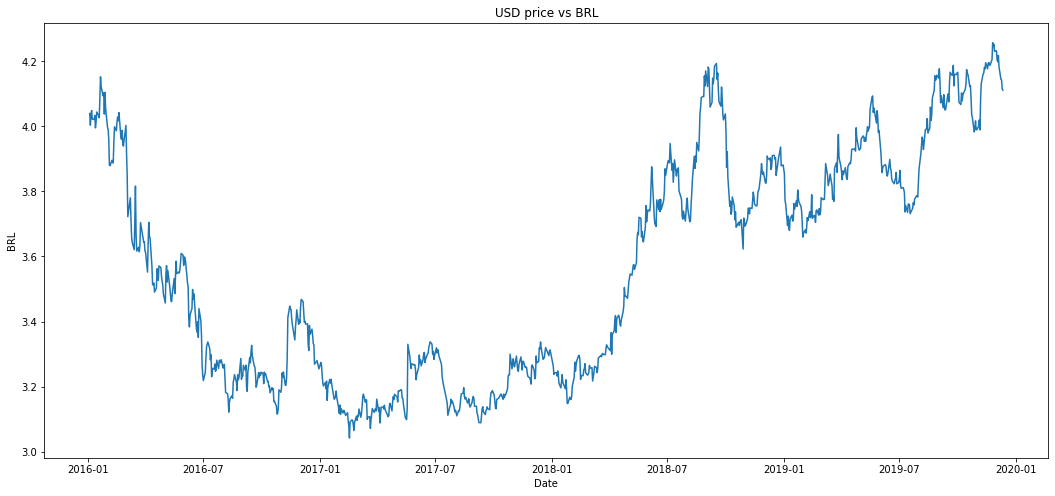

In [21]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=dataUSD, x="Date", y="BRL").set_title("USD price vs BRL");

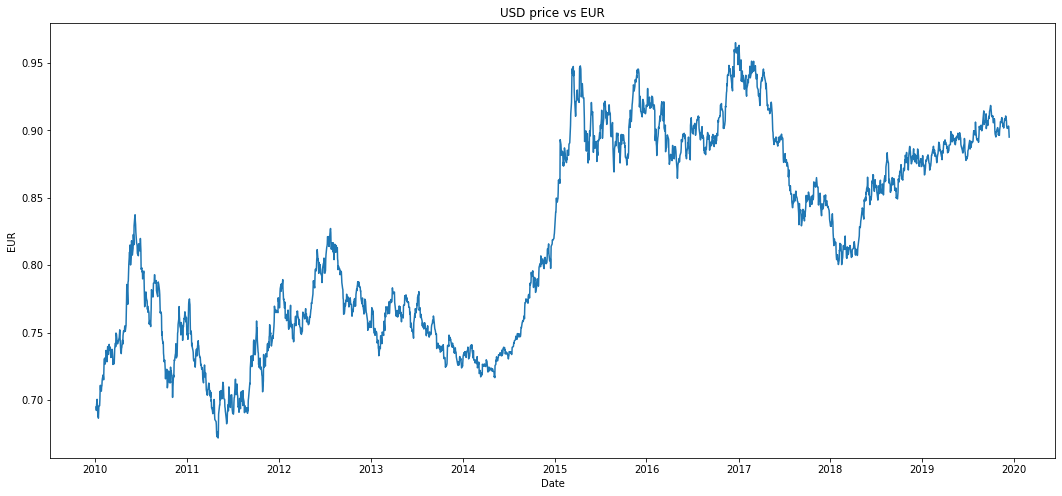

In [8]:
plt.figure(figsize=(18, 8))
g = sns.lineplot(data=dataUSD, x="Date", y="EUR").set_title("USD price vs EUR");

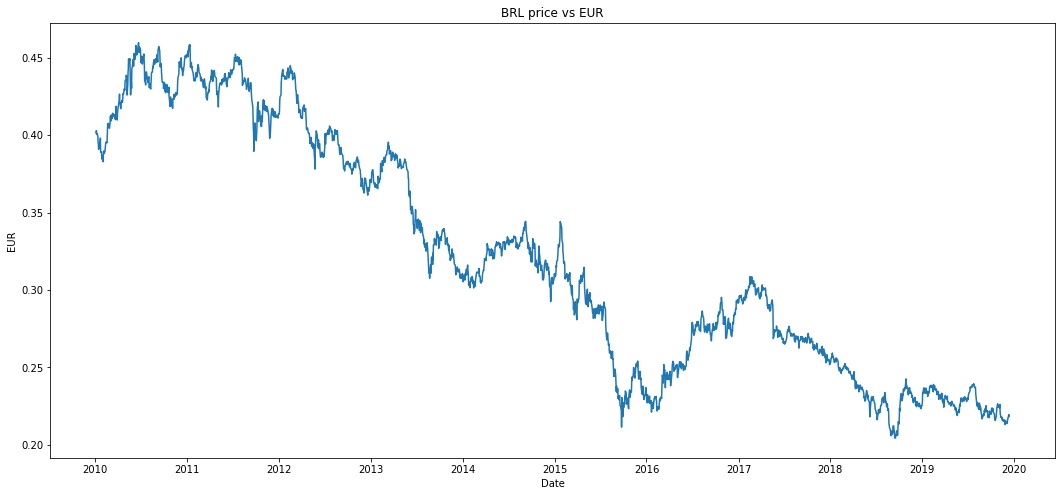

In [9]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=dataBRL, x="Date", y="EUR").set_title("BRL price vs EUR");

2011 foi o ano que a chave virou e o Dollar voltou a se valorizar sobre o Real. No Brasil tivemos a eleição de Dilma e no Mundo, o suposto final da crise financeira mundial que começou nos Estados Unidos em 2007.

fontes: https://www.theguardian.com/business/2012/aug/07/credit-crunch-boom-bust-timeline e 
http://g1.globo.com/politica/posse-de-dilma/noticia/2011/01/dilma-e-empossada-presidente-da-republica.html
    

A forte valorização do Dollar de 2014-2015 aconteceu em relação ao Real e ao Euro, o que diz uma força do Dollar e não necessariamente uma fraqueza das outras moedas. O mesmo aconteceu em 2018.

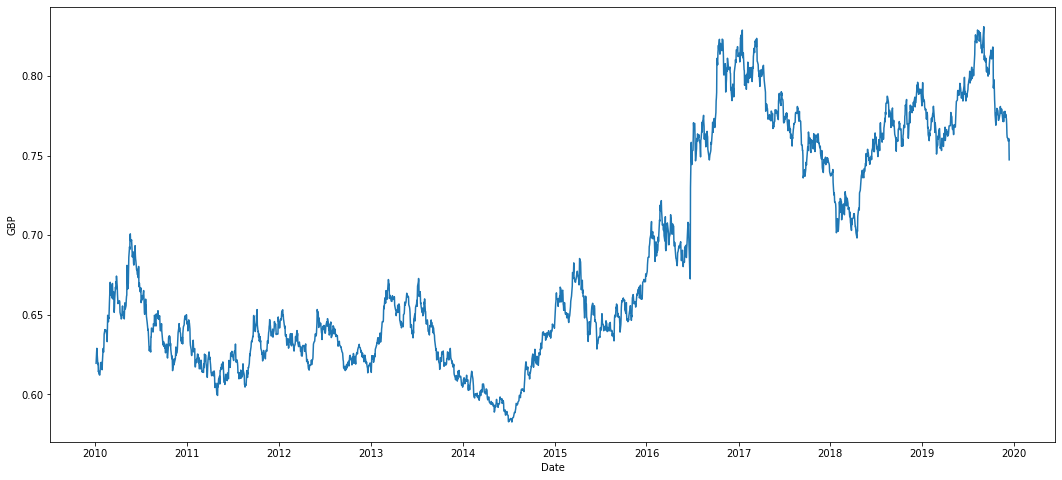

In [10]:
plt.figure(figsize=(18, 8))
sns.lineplot(data=dataUSD, x="Date", y="GBP");

É possivel ver uma forte desvalorização do Dollar em relação a Libra Esterina no 2º semestre de 2019.

<h3> Processo de crição da função criardf()<h3/>

In [11]:
import requests
import pandas as pd
import json

In [12]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [13]:
url = "https://api.exchangeratesapi.io/history"
response = requests.get(url+"?base=USD&start_at=2016-01-01&end_at=2019-12-12")
response

<Response [200]>

In [14]:
data2 = pd.DataFrame(response.json())
data2

,rates,start_at,base,end_at
2016-01-04,"{'CAD': 1.3921820518, 'HKD': 7.7504129198, 'US...",2016-01-01,USD,2019-12-12
2016-01-05,"{'CAD': 1.3936348409, 'HKD': 7.7514423972, 'US...",2016-01-01,USD,2019-12-12
2016-01-06,"{'CAD': 1.4091416868, 'HKD': 7.7519083969, 'US...",2016-01-01,USD,2019-12-12
2016-01-07,"{'CAD': 1.4133235186, 'HKD': 7.752944424, 'USD...",2016-01-01,USD,2019-12-12
2016-01-08,"{'CAD': 1.4106435871, 'HKD': 7.762821103, 'USD...",2016-01-01,USD,2019-12-12
...,...,...,...,...
2019-12-06,"{'CAD': 1.3176491797, 'HKD': 7.8287362538, 'IS...",2016-01-01,USD,2019-12-12
2019-12-09,"{'CAD': 1.3250564334, 'HKD': 7.8277200903, 'IS...",2016-01-01,USD,2019-12-12
2019-12-10,"{'CAD': 1.3240046944, 'HKD': 7.8262164846, 'IS...",2016-01-01,USD,2019-12-12
2019-12-11,"{'CAD': 1.3237923251, 'HKD': 7.8138148984, 'IS...",2016-01-01,USD,2019-12-12


In [15]:
# olhar a coluna com dict
dataRates = pd.DataFrame(data2["rates"])
dataRates

,rates
2016-01-04,"{'CAD': 1.3921820518, 'HKD': 7.7504129198, 'US..."
2016-01-05,"{'CAD': 1.3936348409, 'HKD': 7.7514423972, 'US..."
2016-01-06,"{'CAD': 1.4091416868, 'HKD': 7.7519083969, 'US..."
2016-01-07,"{'CAD': 1.4133235186, 'HKD': 7.752944424, 'USD..."
2016-01-08,"{'CAD': 1.4106435871, 'HKD': 7.762821103, 'USD..."
...,...
2019-12-06,"{'CAD': 1.3176491797, 'HKD': 7.8287362538, 'IS..."
2019-12-09,"{'CAD': 1.3250564334, 'HKD': 7.8277200903, 'IS..."
2019-12-10,"{'CAD': 1.3240046944, 'HKD': 7.8262164846, 'IS..."
2019-12-11,"{'CAD': 1.3237923251, 'HKD': 7.8138148984, 'IS..."


In [16]:
# criar df com a coluna de dict
dataUSD = data2["rates"].apply(pd.Series)
dataUSD

,CAD,HKD,USD,PHP,DKK,HUF,CZK,GBP,RON,SEK,IDR,INR,BRL,RUB,HRK,JPY,THB,CHF,EUR,MYR,BGN,TRY,CNY,NOK,NZD,ZAR,MXN,SGD,AUD,ILS,KRW,PLN,ISK
2016-01-04,1.392182,7.750413,1.0,47.158194,6.847128,289.401725,24.796293,0.677280,4.144797,8.414021,13942.585796,66.633327,4.039549,73.108644,7.011837,119.086071,36.159846,0.999358,0.917600,4.346027,1.794641,2.954028,6.534043,8.852542,1.481556,15.558635,17.375023,1.425307,1.390439,3.914388,1190.924940,3.941549,NaN
2016-01-05,1.393635,7.751442,1.0,46.874186,6.942583,293.318444,25.146101,0.681509,4.212544,8.583194,13846.528941,66.586544,4.003629,73.387307,7.108505,119.002420,36.121347,1.009399,0.930579,4.343011,1.820026,2.978690,6.520938,8.922390,1.489019,15.600503,17.289968,1.424716,1.394193,3.921831,1188.367765,4.009306,NaN
2016-01-06,1.409142,7.751908,1.0,47.093651,6.944982,293.064606,25.159188,0.683672,4.210017,8.595234,13953.546826,66.862968,4.033793,74.464066,7.112735,118.404394,36.228821,1.009682,0.930925,4.411469,1.820704,3.008285,6.552597,8.957829,1.504934,15.828710,17.452988,1.434463,1.413796,3.946099,1200.148948,4.037796,NaN
2016-01-07,1.413324,7.752944,1.0,47.134707,6.863820,290.568642,24.871181,0.685913,4.167096,8.536989,13930.051527,66.894737,4.048675,75.246227,7.029812,117.537725,36.291866,1.000644,0.920132,4.407803,1.799595,3.017206,6.594774,8.922985,1.514906,16.101123,17.682738,1.436511,1.430806,3.928966,1202.493559,4.003681,NaN
2016-01-08,1.410644,7.762821,1.0,47.144830,6.868428,290.516527,24.879845,0.686115,4.168585,8.529601,13913.359727,66.679495,4.022189,74.038670,7.036829,118.322438,36.264617,0.999908,0.920726,4.384035,1.800755,2.991529,6.590277,8.913544,1.514593,16.008655,17.791272,1.436884,1.426664,3.922015,1201.344259,4.007274,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-06,1.317649,7.828736,1.0,50.791419,6.735352,297.629349,23.015143,0.761249,4.308635,9.481071,14020.560663,71.248873,4.182621,63.767893,6.705426,108.563187,30.327204,0.988643,0.901388,4.159456,1.762935,5.759239,7.030197,9.125203,1.522084,14.623400,19.349017,1.359654,1.459347,3.467189,1187.407608,3.855417,121.326843
2019-12-09,1.325056,7.827720,1.0,50.849661,6.746998,299.395034,23.050113,0.760226,4.315034,9.520090,14001.002257,71.067269,4.144740,63.722889,6.716749,108.487585,30.312415,0.989526,0.902935,4.160181,1.765959,5.803160,7.039278,9.141129,1.525056,14.607675,19.277562,1.359819,1.465282,3.470339,1191.232506,3.867901,121.264108
2019-12-10,1.324005,7.826216,1.0,50.774578,6.746502,298.681954,23.045048,0.758987,4.312810,9.530107,14010.002708,70.922632,4.142909,63.611718,6.716439,108.576329,30.295206,0.986007,0.902772,4.164485,1.765641,5.804821,7.038729,9.192290,1.529746,14.816376,19.220276,1.359754,1.469261,3.464115,1192.326442,3.873161,121.603322
2019-12-11,1.323792,7.813815,1.0,50.816253,6.747449,298.636569,23.044695,0.760677,4.315395,9.444244,14044.496614,70.800451,4.116479,63.559819,6.716479,108.749436,30.264560,0.985643,0.902935,4.164515,1.765959,5.810293,7.039278,9.164334,1.528126,14.764063,19.225282,1.359819,1.462212,3.476569,1193.227991,3.870790,121.986456


In [17]:
# criar novo index e renomear antigo index para "Date"
dataUSD.reset_index(inplace=True)
dataUSD.rename(columns = {"index":"Date"}, inplace=True)
dataUSD

,Date,CAD,HKD,USD,PHP,DKK,HUF,CZK,GBP,RON,SEK,IDR,INR,BRL,RUB,HRK,JPY,THB,CHF,EUR,MYR,BGN,TRY,CNY,NOK,NZD,ZAR,MXN,SGD,AUD,ILS,KRW,PLN,ISK
0,2016-01-04,1.392182,7.750413,1.0,47.158194,6.847128,289.401725,24.796293,0.677280,4.144797,8.414021,13942.585796,66.633327,4.039549,73.108644,7.011837,119.086071,36.159846,0.999358,0.917600,4.346027,1.794641,2.954028,6.534043,8.852542,1.481556,15.558635,17.375023,1.425307,1.390439,3.914388,1190.924940,3.941549,NaN
1,2016-01-05,1.393635,7.751442,1.0,46.874186,6.942583,293.318444,25.146101,0.681509,4.212544,8.583194,13846.528941,66.586544,4.003629,73.387307,7.108505,119.002420,36.121347,1.009399,0.930579,4.343011,1.820026,2.978690,6.520938,8.922390,1.489019,15.600503,17.289968,1.424716,1.394193,3.921831,1188.367765,4.009306,NaN
2,2016-01-06,1.409142,7.751908,1.0,47.093651,6.944982,293.064606,25.159188,0.683672,4.210017,8.595234,13953.546826,66.862968,4.033793,74.464066,7.112735,118.404394,36.228821,1.009682,0.930925,4.411469,1.820704,3.008285,6.552597,8.957829,1.504934,15.828710,17.452988,1.434463,1.413796,3.946099,1200.148948,4.037796,NaN
3,2016-01-07,1.413324,7.752944,1.0,47.134707,6.863820,290.568642,24.871181,0.685913,4.167096,8.536989,13930.051527,66.894737,4.048675,75.246227,7.029812,117.537725,36.291866,1.000644,0.920132,4.407803,1.799595,3.017206,6.594774,8.922985,1.514906,16.101123,17.682738,1.436511,1.430806,3.928966,1202.493559,4.003681,NaN
4,2016-01-08,1.410644,7.762821,1.0,47.144830,6.868428,290.516527,24.879845,0.686115,4.168585,8.529601,13913.359727,66.679495,4.022189,74.038670,7.036829,118.322438,36.264617,0.999908,0.920726,4.384035,1.800755,2.991529,6.590277,8.913544,1.514593,16.008655,17.791272,1.436884,1.426664,3.922015,1201.344259,4.007274,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,2019-12-06,1.317649,7.828736,1.0,50.791419,6.735352,297.629349,23.015143,0.761249,4.308635,9.481071,14020.560663,71.248873,4.182621,63.767893,6.705426,108.563187,30.327204,0.988643,0.901388,4.159456,1.762935,5.759239,7.030197,9.125203,1.522084,14.623400,19.349017,1.359654,1.459347,3.467189,1187.407608,3.855417,121.326843
1007,2019-12-09,1.325056,7.827720,1.0,50.849661,6.746998,299.395034,23.050113,0.760226,4.315034,9.520090,14001.002257,71.067269,4.144740,63.722889,6.716749,108.487585,30.312415,0.989526,0.902935,4.160181,1.765959,5.803160,7.039278,9.141129,1.525056,14.607675,19.277562,1.359819,1.465282,3.470339,1191.232506,3.867901,121.264108
1008,2019-12-10,1.324005,7.826216,1.0,50.774578,6.746502,298.681954,23.045048,0.758987,4.312810,9.530107,14010.002708,70.922632,4.142909,63.611718,6.716439,108.576329,30.295206,0.986007,0.902772,4.164485,1.765641,5.804821,7.038729,9.192290,1.529746,14.816376,19.220276,1.359754,1.469261,3.464115,1192.326442,3.873161,121.603322
1009,2019-12-11,1.323792,7.813815,1.0,50.816253,6.747449,298.636569,23.044695,0.760677,4.315395,9.444244,14044.496614,70.800451,4.116479,63.559819,6.716479,108.749436,30.264560,0.985643,0.902935,4.164515,1.765959,5.810293,7.039278,9.164334,1.528126,14.764063,19.225282,1.359819,1.462212,3.476569,1193.227991,3.870790,121.986456


In [18]:
# mudar o valor da coluna "Date" para datetime
dataUSD["Date"] = pd.to_datetime(dataUSD["Date"])

In [19]:
print(dataUSD.columns.values)

['Date' 'CAD' 'HKD' 'USD' 'PHP' 'DKK' 'HUF' 'CZK' 'GBP' 'RON' 'SEK' 'IDR'
 'INR' 'BRL' 'RUB' 'HRK' 'JPY' 'THB' 'CHF' 'EUR' 'MYR' 'BGN' 'TRY' 'CNY'
 'NOK' 'NZD' 'ZAR' 'MXN' 'SGD' 'AUD' 'ILS' 'KRW' 'PLN' 'ISK']


In [20]:
# mudar a ordem das colunas para que "USD" fique no começo da tabela
dataUSD = dataUSD[['Date','USD','CAD', 'HKD',  'PHP', 'DKK', 'HUF', 'CZK', 'GBP', 'RON', 'SEK', 'IDR',
 'INR', 'BRL', 'RUB', 'HRK', 'JPY', 'THB', 'CHF', 'EUR', 'MYR', 'BGN', 'TRY', 'CNY',
 'NOK', 'NZD', 'ZAR', 'MXN', 'SGD', 'AUD', 'ILS', 'KRW', 'PLN', 'ISK']]
dataUSD

,Date,USD,CAD,HKD,PHP,DKK,HUF,CZK,GBP,RON,SEK,IDR,INR,BRL,RUB,HRK,JPY,THB,CHF,EUR,MYR,BGN,TRY,CNY,NOK,NZD,ZAR,MXN,SGD,AUD,ILS,KRW,PLN,ISK
0,2016-01-04,1.0,1.392182,7.750413,47.158194,6.847128,289.401725,24.796293,0.677280,4.144797,8.414021,13942.585796,66.633327,4.039549,73.108644,7.011837,119.086071,36.159846,0.999358,0.917600,4.346027,1.794641,2.954028,6.534043,8.852542,1.481556,15.558635,17.375023,1.425307,1.390439,3.914388,1190.924940,3.941549,NaN
1,2016-01-05,1.0,1.393635,7.751442,46.874186,6.942583,293.318444,25.146101,0.681509,4.212544,8.583194,13846.528941,66.586544,4.003629,73.387307,7.108505,119.002420,36.121347,1.009399,0.930579,4.343011,1.820026,2.978690,6.520938,8.922390,1.489019,15.600503,17.289968,1.424716,1.394193,3.921831,1188.367765,4.009306,NaN
2,2016-01-06,1.0,1.409142,7.751908,47.093651,6.944982,293.064606,25.159188,0.683672,4.210017,8.595234,13953.546826,66.862968,4.033793,74.464066,7.112735,118.404394,36.228821,1.009682,0.930925,4.411469,1.820704,3.008285,6.552597,8.957829,1.504934,15.828710,17.452988,1.434463,1.413796,3.946099,1200.148948,4.037796,NaN
3,2016-01-07,1.0,1.413324,7.752944,47.134707,6.863820,290.568642,24.871181,0.685913,4.167096,8.536989,13930.051527,66.894737,4.048675,75.246227,7.029812,117.537725,36.291866,1.000644,0.920132,4.407803,1.799595,3.017206,6.594774,8.922985,1.514906,16.101123,17.682738,1.436511,1.430806,3.928966,1202.493559,4.003681,NaN
4,2016-01-08,1.0,1.410644,7.762821,47.144830,6.868428,290.516527,24.879845,0.686115,4.168585,8.529601,13913.359727,66.679495,4.022189,74.038670,7.036829,118.322438,36.264617,0.999908,0.920726,4.384035,1.800755,2.991529,6.590277,8.913544,1.514593,16.008655,17.791272,1.436884,1.426664,3.922015,1201.344259,4.007274,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,2019-12-06,1.0,1.317649,7.828736,50.791419,6.735352,297.629349,23.015143,0.761249,4.308635,9.481071,14020.560663,71.248873,4.182621,63.767893,6.705426,108.563187,30.327204,0.988643,0.901388,4.159456,1.762935,5.759239,7.030197,9.125203,1.522084,14.623400,19.349017,1.359654,1.459347,3.467189,1187.407608,3.855417,121.326843
1007,2019-12-09,1.0,1.325056,7.827720,50.849661,6.746998,299.395034,23.050113,0.760226,4.315034,9.520090,14001.002257,71.067269,4.144740,63.722889,6.716749,108.487585,30.312415,0.989526,0.902935,4.160181,1.765959,5.803160,7.039278,9.141129,1.525056,14.607675,19.277562,1.359819,1.465282,3.470339,1191.232506,3.867901,121.264108
1008,2019-12-10,1.0,1.324005,7.826216,50.774578,6.746502,298.681954,23.045048,0.758987,4.312810,9.530107,14010.002708,70.922632,4.142909,63.611718,6.716439,108.576329,30.295206,0.986007,0.902772,4.164485,1.765641,5.804821,7.038729,9.192290,1.529746,14.816376,19.220276,1.359754,1.469261,3.464115,1192.326442,3.873161,121.603322
1009,2019-12-11,1.0,1.323792,7.813815,50.816253,6.747449,298.636569,23.044695,0.760677,4.315395,9.444244,14044.496614,70.800451,4.116479,63.559819,6.716479,108.749436,30.264560,0.985643,0.902935,4.164515,1.765959,5.810293,7.039278,9.164334,1.528126,14.764063,19.225282,1.359819,1.462212,3.476569,1193.227991,3.870790,121.986456
